In [1]:
%matplotlib inline

## Funções de base de Newton

Código gerador de funções de base de Newton de grau $n$ por computação simbólica.

In [2]:
from sympy import Symbol

def symbolic_vector(n,var):
    """Cria uma lista com n variáveis simbólicas.
    
        entrada:
            n: numero de pontos
            var: uma string (ex. 'x')
        saida:
            V: ['var0','var1',...,'varn-1']
    """
    if not isinstance(var,str):
        raise TypeError("{0} must be a string.".format(var))                 
        
    V = []
    for i in range(0,n):
        v = var + str(i)
        V.append(Symbol(v))
        
    return V

def N_nj(X,j):
    """ Calcula a função de base de Newton N_{n,j}(x). 
        
        entrada:
            X: um vetor contendo variáveis simbólicas
    """
    # pega a variavel base passada e converte para simbólica
    x = X[1]
    x = str(x)
    x = Symbol(x[0:-1])
    N = x/x;
    if j > 0: 
        for k in range(0,j):
            N *= (x - X[k])
            
    return N



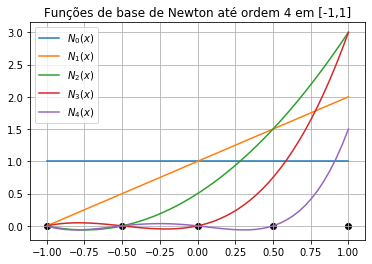

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# número de nós de interpolação: interpolação de (n-1)-ésimo grau
n = 5

# domínio de interpolação
x0,x1 = -1,1

# constroi vetor simbolico em x
X = symbolic_vector(n,'x')

# constroi pontos numericos 
xp = np.linspace(x0,x1,num=n,endpoint=True)

# cria malha numérica
xv = np.linspace(x0,x1)

# matriz das funções
Y = np.zeros((n,len(xv)))
for i in range(0,n):
    Y[i,] = np.zeros(np.shape(xv))

# montagem de dict para substituição: [xk,x0,x1,x2,...]
k = [str(i) for i in X]
k.insert(0,'x')

# preenche matriz
for i in range(0,Y.shape[0]):
    for j in range(0,np.size(xv)):
        v = list(np.concatenate([np.asarray([xv[j]]),xp]))
        d = dict(zip(k,v))
        Y[i,j] = N_nj(X,i).subs(d)

# plotagem das funções

# nós 
plt.scatter(xp,np.zeros(xp.shape),c= 'k')

leg = []
for i in range(0,Y.shape[0]):
    plt.plot(xv,Y[i,])
    s = '$N_{' + str(i) + '}(x)$'
    leg.append(s)
        
plt.grid()        
plt.legend(leg,loc='best')
plt.title('Funções de base de Newton até ordem ' + str(n-1) + ' em ['+str(x0)+','+str(x1)+']');